## PROJECT TITLE: "Data Analytics on IMDB TOP1000 dataset"
### Author: Alexandru Cebotari
### Location: Romania

### Run to install needed packages:

In [18]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install wordcloud
# %pip install nltk

### Import packages:

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

FILE = 'imdb_top_1000.csv'
df = pd.read_csv(FILE)
df[0:3]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


### Filter only desired columns

In [20]:
column_names = list(df.columns.values)
print(column_names)

desired_columns = ['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 
                   'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'No_of_Votes', 'Gross']
df = df[desired_columns]
df[0:3]

['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


,Series_Title,Released_Year,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,"534,858,444"


### What year has the most movies in the list?

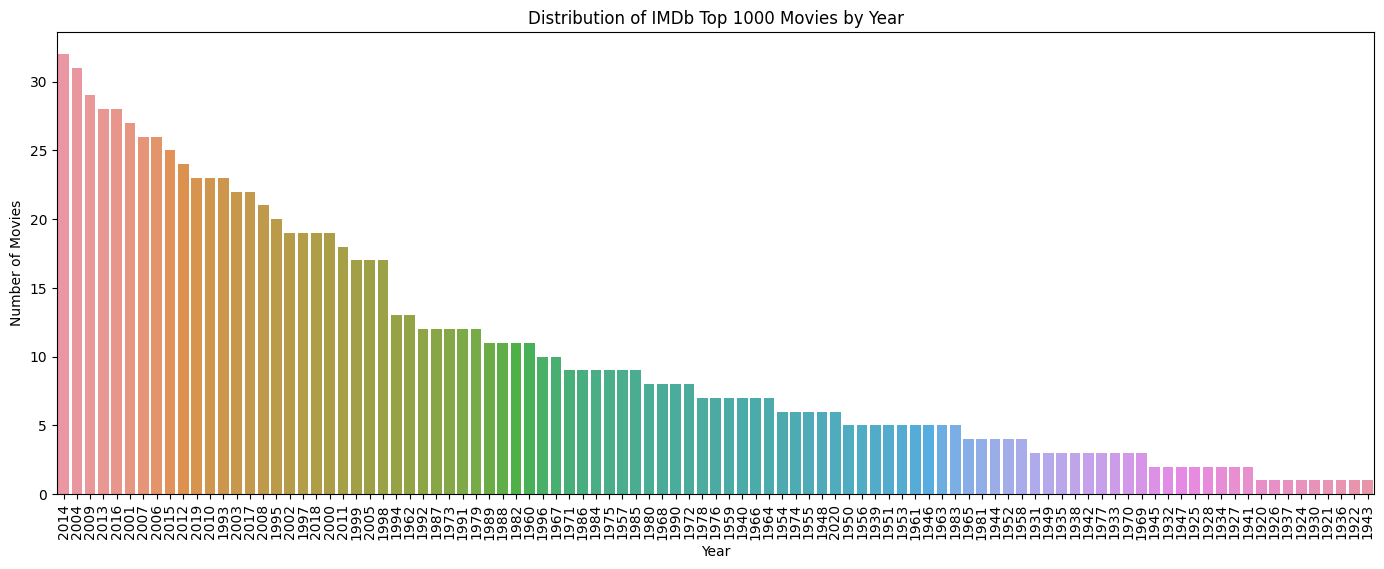

In [30]:
year_counts = df['Released_Year'].value_counts()

# 'Appollo 13' has 'PG' instead of released year. Let's fix it
cond = df['Released_Year'] == 'PG'
df.loc[cond,'Released_Year'] = '1995'

# Create a bar plot using seaborn
plt.figure(figsize=(17,6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDb Top 1000 Movies by Year')
plt.xticks(rotation=90)
plt.show()

### Which actor has the most main roles?

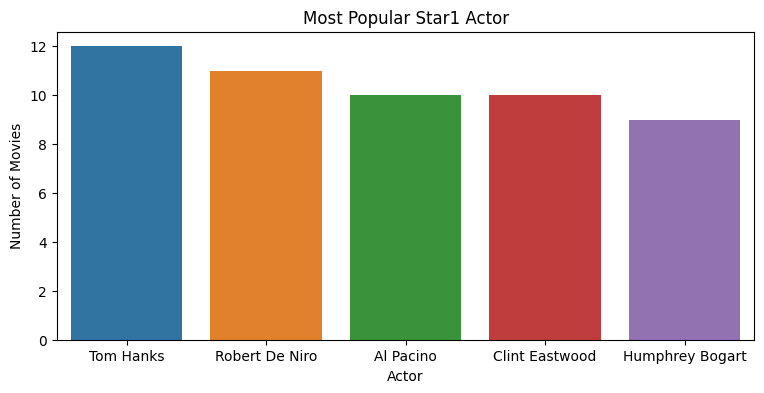

In [22]:
star1_counts = df['Star1'].value_counts()[0:5]

# Create a bar plot using seaborn
plt.figure(figsize=(9,4))
sns.barplot(x=star1_counts.index, y=star1_counts.values)
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Most Popular Star1 Actor')
plt.show()

### Which actor has the most secondary roles?

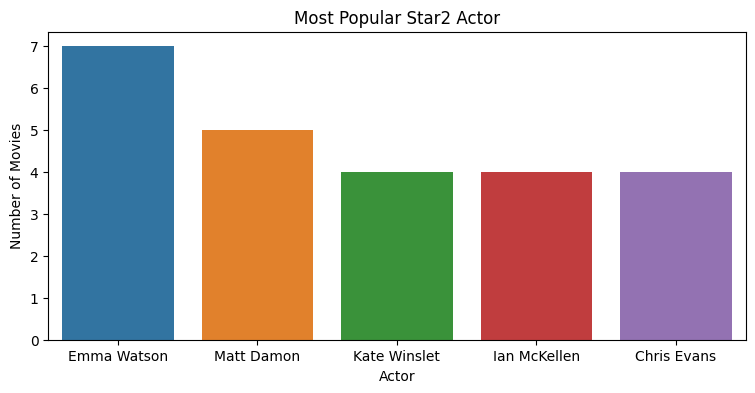

In [23]:
star2_counts = df['Star2'].value_counts()[0:5]

# Create a bar plot using seaborn
plt.figure(figsize=(9,4))
sns.barplot(x=star2_counts.index, y=star2_counts.values)
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Most Popular Star2 Actor')
plt.show()

### Which director has the most movies in the list?

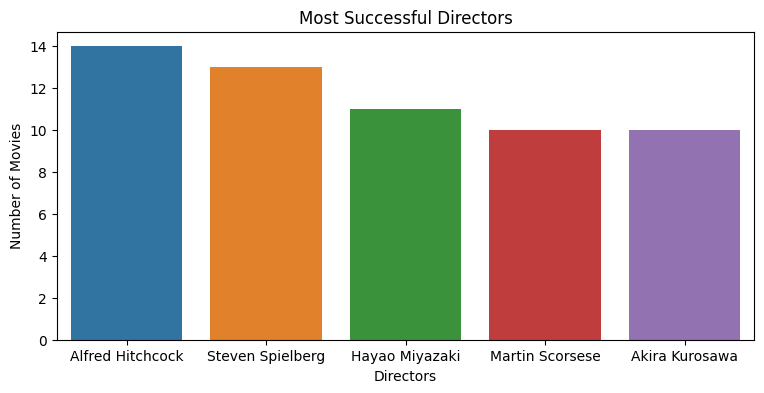

In [24]:
director_counts = df['Director'].value_counts()[0:5]

# Create a bar plot using seaborn
plt.figure(figsize=(9,4))
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.title('Most Successful Directors')
plt.show()

### Which word appears the most in "Overview" section?

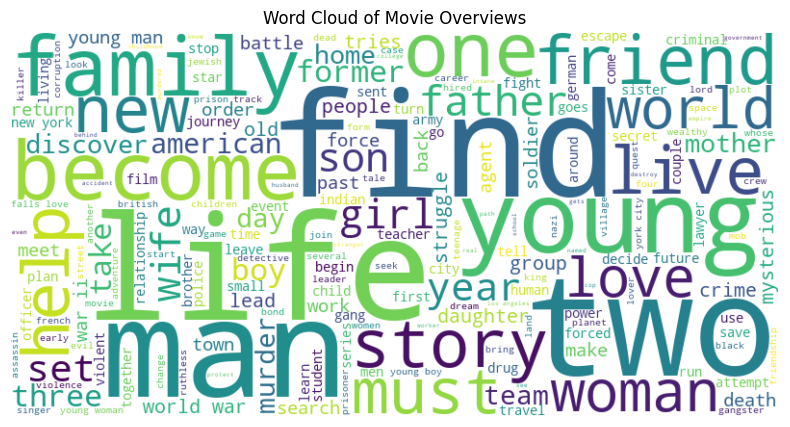

In [25]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Concatenate all overviews into a single string
all_overviews = ' '.join(df['Overview'].astype(str))

# Tokenize the words
words = word_tokenize(all_overviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()

### Which genre is the most popular?

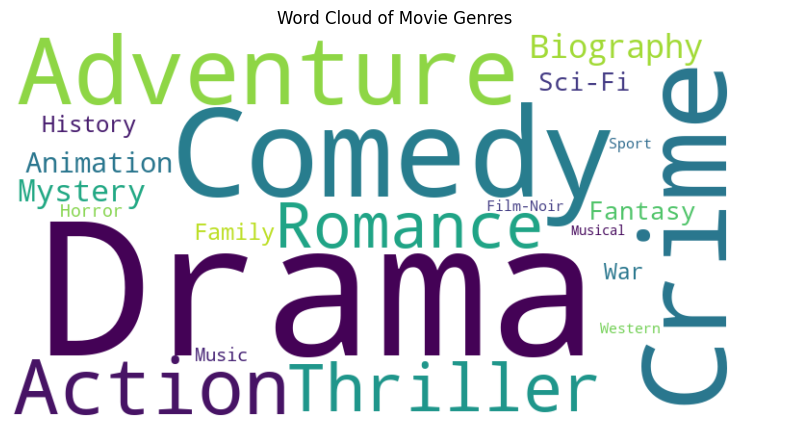

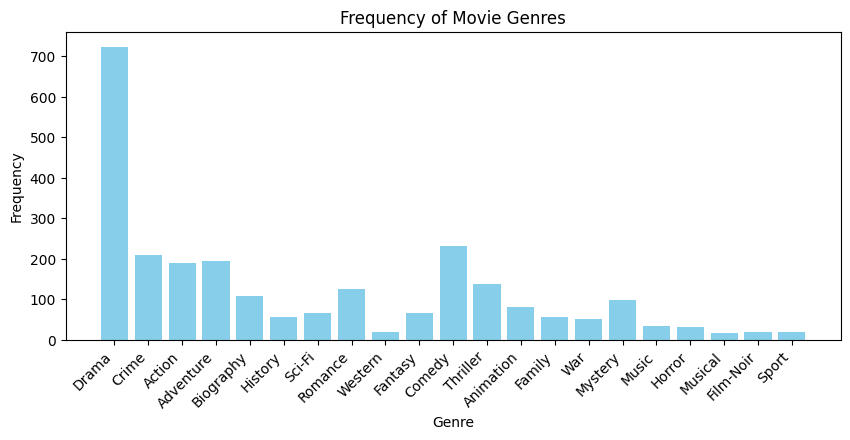

In [43]:
from collections import Counter

# Split genres and create a list of all genres
all_genres = df['Genre'].str.split(', ').explode()

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()

# Display a bar plot
plt.figure(figsize=(10, 4))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Genres')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Heatmap to understand the relation betweeen 'IMDB_Rating', 'Meta_score', 'No_of_Votes':

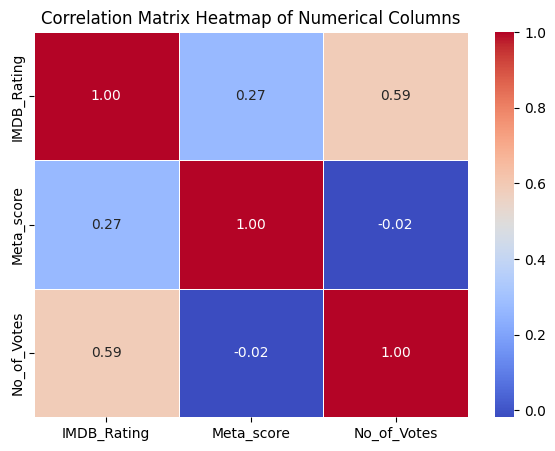

In [27]:
# Select numerical columns for the correlation matrix
numerical_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']

# Check for missing values and handle them
df_numerical = df[numerical_columns]
df_numerical = df_numerical.dropna()

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Numerical Columns')
plt.show()

### Analyse sentiment distribution in movies 'Overview':

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
Name: Overview, dtype: object


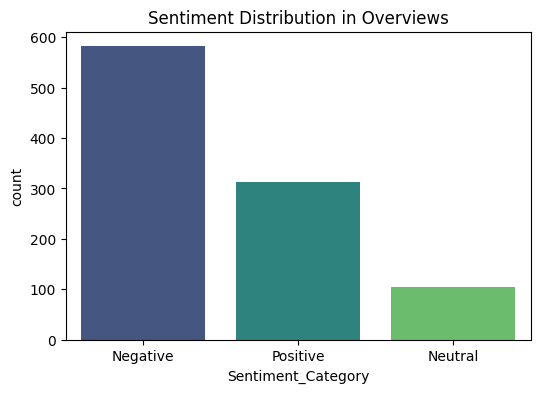

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

print(df['Overview'][0:3])
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Overview' column
df['Sentiment'] = df['Overview'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Map sentiment scores to categories
conditions = [
    (df['Sentiment'] > 0),
    (df['Sentiment'] == 0),
    (df['Sentiment'] < 0)]

choices = ['Positive', 'Neutral', 'Negative']

# Display the DataFrame with sentiment analysis results
def categorize_sentiment(x):
    if x > 0:
        return 'Positive'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

# Create a bar plot for sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment_Category', data=df, palette='viridis')
plt.title('Sentiment Distribution in Overviews')
plt.show()